In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

df=pd.read_csv("sydney_traffic_incidents_clean.csv")
print("dataset shape", df.shape)
df.head()

dataset shape (43012, 84)


,Main_Category,Longitude,Latitude,Day,duration,Primary_Vehicle,Secondary_Vehicle,Is_Major_Incident,Advice_A,Advice_B,...,Emergency services,Transport for NSW,Tow truck,Heavy vehicle tow truck,Incident_Type,Num_Vehicles_Involved,Month,Hour,distance_to_CBD,duration_class
0,1,151.058,-33.9431,5,39.319950,1,2,0,10,0,...,1.0,0.0,0.0,0.0,0.0,2.0,8.0,19.0,15.781064,1.0
1,0,151.159,-33.8096,6,12.029000,1,9,0,10,134,...,0.0,0.0,0.0,0.0,1.0,1.0,8.0,0.0,8.323913,0.0
2,1,150.875,-33.7344,6,16.956667,1,9,0,26,134,...,1.0,0.0,0.0,0.0,0.0,1.0,8.0,1.0,34.354983,0.0
3,1,150.973,-33.8172,6,42.804117,5,2,0,10,0,...,1.0,1.0,0.0,0.0,0.0,1.0,8.0,1.0,22.500677,1.0
4,1,150.981,-33.7919,6,40.840000,3,4,0,10,134,...,0.0,0.0,0.0,0.0,0.0,3.0,8.0,1.0,22.753003,1.0


In [3]:
# just checking what's missing in the data
null_info = df.isna().sum()
print(null_info)

# filtering out rows where duration is weird or zero
# (accident logs shouldn't have 0 duration anyway)
clean_df = df[df["duration"] > 0]

# resetting index so it doesn't look jumpy
clean_df = clean_df.reset_index(drop=True)

print("after cleaning:", clean_df.shape)

# replacing df with cleaned one so rest of code works
df = clean_df


Main_Category            0
Longitude                0
Latitude                 0
Day                      0
duration                 0
                        ..
Num_Vehicles_Involved    1
Month                    1
Hour                     1
distance_to_CBD          1
duration_class           1
Length: 84, dtype: int64
after cleaning: (43012, 84)


In [26]:
# selecting columns which make sense for the models
# (these are mostly used in the Sydney paper)
cols = [
    "Longitude","Latitude","Day",
    "Primary_V","Secondary","Is_Major_Ir",
    "Affected_L","Traffic_Vol",
    "Actual_Nui","SA2_CODE","SA3_CODE","AREASQKM"
]

# checking if all selected cols are present
use_cols = [c for c in cols if c in df.columns]

print("using", len(use_cols), "features")

X = df[use_cols]
y = df["duration"]


using 5 features


In [6]:
from sklearn.model_selection import train_test_split

# simple 80/20 split
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

x_train.shape, x_test.shape


((34409, 4), (8603, 4))

In [7]:
# trying Random Forest first
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

rf_model = RandomForestRegressor(
    n_estimators=250,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(x_train, y_train)
rf_pred = rf_model.predict(x_test)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))

print("RF RMSE:", rf_rmse)

RF RMSE: 49.14502448480295


In [8]:
# creating binary label for classification
df["long_flag"] = (df["duration"] >= 30).astype(int)

Y2 = df["long_flag"]
X2 = df[use_cols]

x_tr2, x_te2, y_tr2, y_te2 = train_test_split(
    X2, Y2, test_size=0.2, random_state=42
)


In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

rf_cls = RandomForestClassifier(
    n_estimators=300,
    random_state=42
)

rf_cls.fit(x_tr2, y_tr2)
rf_cpred = rf_cls.predict(x_te2)

print("RF Acc:", accuracy_score(y_te2, rf_cpred))
print("RF Prec:", precision_score(y_te2, rf_cpred))
print("RF Recall:", recall_score(y_te2, rf_cpred))
print("RF F1:", f1_score(y_te2, rf_cpred))


RF Acc: 0.5628269208415669
RF Prec: 0.5541567695961995
RF Recall: 0.5532368982689115
RF F1: 0.5536964518808591


In [ ]:
print("\n==== REGRESSION SUMMARY ====")
print("RF RMSE :", rf_rmse)
#print("XGB RMSE:", xgb_rmse)

print("\n==== CLASSIFICATION SUMMARY ====")
print("RF F1  :", f1_score(y_te2, rf_cpred))
#print("XGB F1 :", f1_score(y_te2, xgb_cpred))



==== REGRESSION SUMMARY ====
RF RMSE : 50.60003257498165

==== CLASSIFICATION SUMMARY ====
RF F1  : 0.5128009170806267


In [10]:
#importing all the libraries we required to complete the task
import pandas as pd
import numpy as np
import seaborn as sns

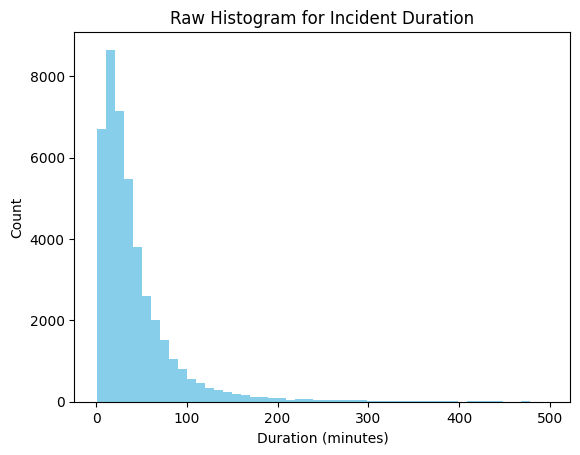

In [11]:
#Visualizations
import matplotlib.pyplot as plt
#Plot 1:  raw histogram for the duration

figsize = (8,4)

plt.hist(df['duration'], bins=50, color='skyblue')

plt.title("Raw Histogram for Incident Duration")

plt.xlabel('Duration (minutes)')

plt.ylabel('Count')

plt.show()



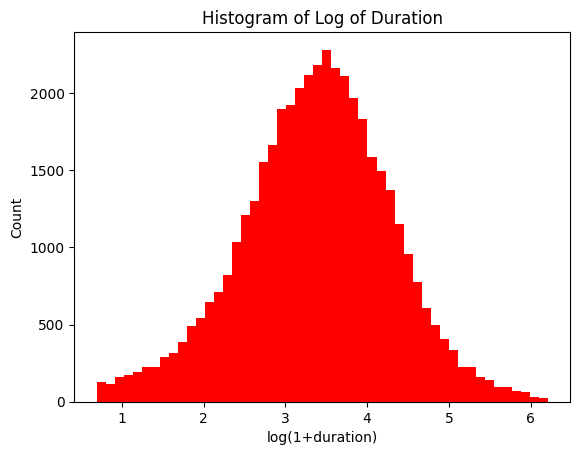

In [12]:
#Plot 2: A histogram for the logged duration to be able to see a pattern.

figsize = (8,4)

plt.hist(np.log1p(df['duration']), bins=50, color='red')

plt.title("Histogram of Log of Duration")

plt.xlabel("log(1+duration)")

plt.ylabel("Count")

plt.show()

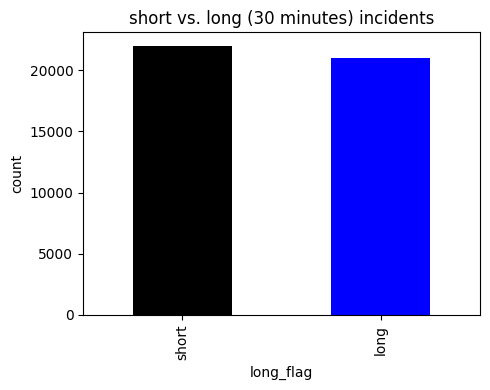

In [13]:
# Bar plot of short vs long incidents

fig = plt.figure(figsize=(5,4))

# bar plots need to be ordered from low to high

df['long_flag'].value_counts().sort_index().plot(kind='bar',color=['Black','Blue'])

plt.title("short vs. long (30 minutes) incidents")

plt.xticks([0,1], ["short", "long"])

plt.ylabel('count')

plt.tight_layout()

plt.show()

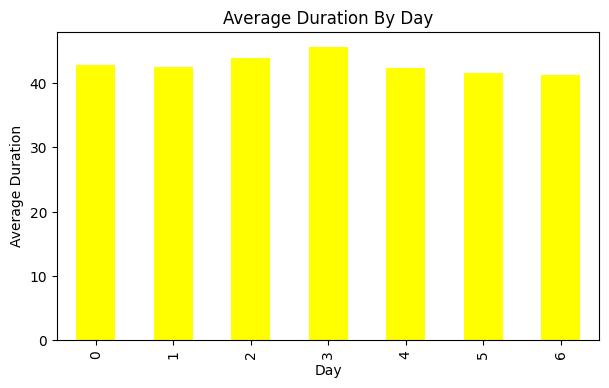

In [14]:
# Day of Week vs Duration

# (Plot 4) Average Duration By Day

avg_duration_by_day = df.groupby('Day')['duration'].mean()

plt.figure(figsize = (7,4))

avg_duration_by_day.plot(kind='bar',color='yellow')

plt.title("Average Duration By Day")

plt.xlabel("Day")

plt.ylabel("Average Duration")

plt.show()

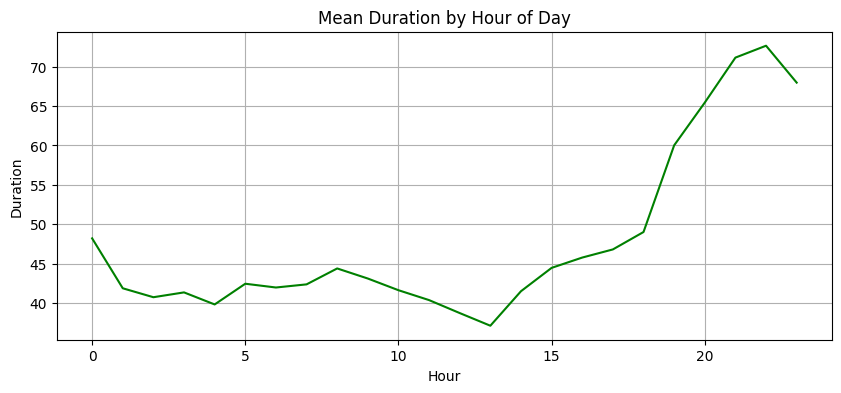

In [15]:
# Plot 5: which hours have long delays?
hr_avg = df.groupby('Hour')['duration'].mean()

plt.figure(figsize=(10,4))
hr_avg.plot(color='green')
plt.title("Mean Duration by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Duration")
plt.grid(True)
plt.show()


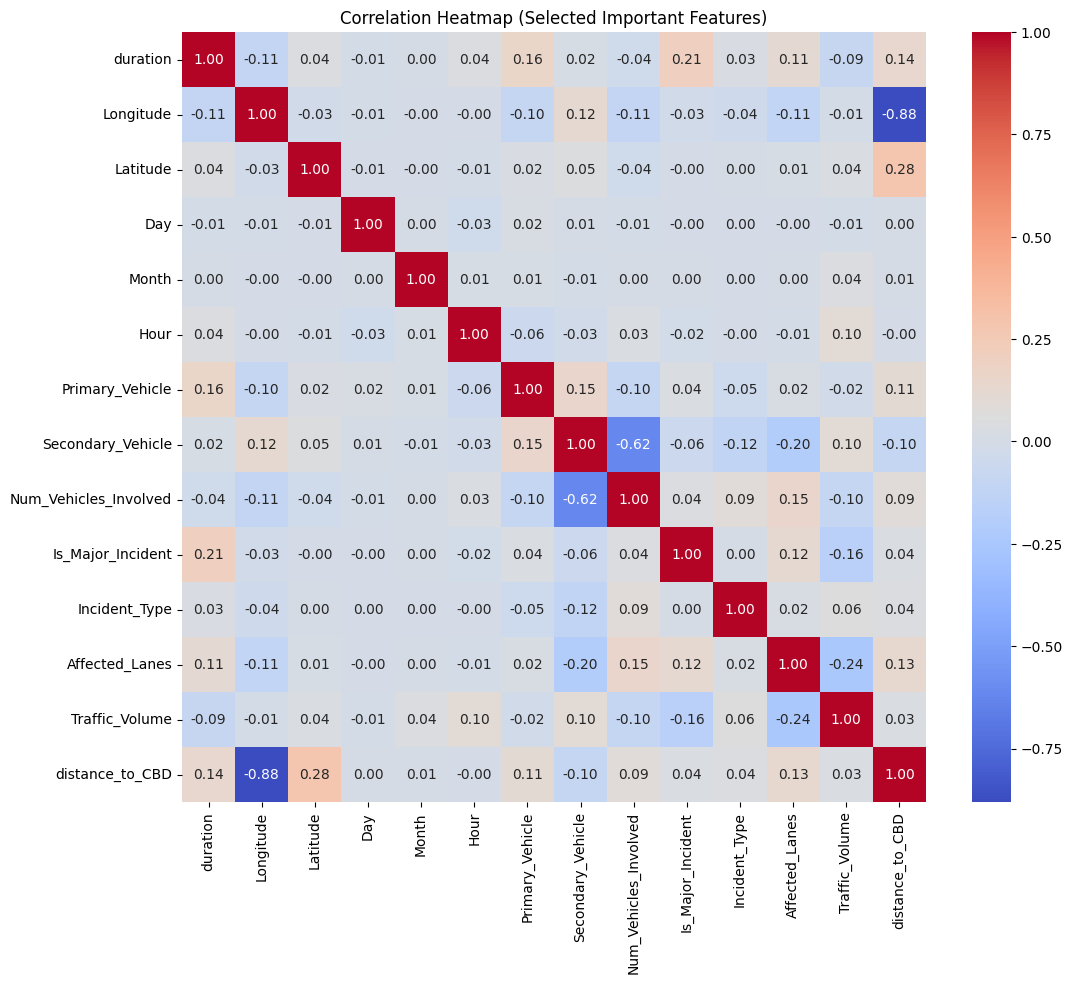

In [ ]:
# picking a smaller set so the heatmap is readable
corr_cols = [
    "duration",
    "Longitude",
    "Latitude",
    "Day",
    "Month",
    "Hour",
    "Primary_Vehicle",
    "Secondary_Vehicle",
    "Num_Vehicles_Involved",
    "Is_Major_Incident",
    "Incident_Type",
    "Affected_Lanes",
    "Actual_Number_of_Lanes ",
    "Traffic_Volume",
    "distance_to_CBD"
]

# keep only those that actually exist in df
corr_cols = [c for c in corr_cols if c in df.columns]

# computing correlation
c2 = df[corr_cols].corr()

plt.figure(figsize=(12,10))
sns.heatmap(c2, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Selected Important Features)")
plt.show()


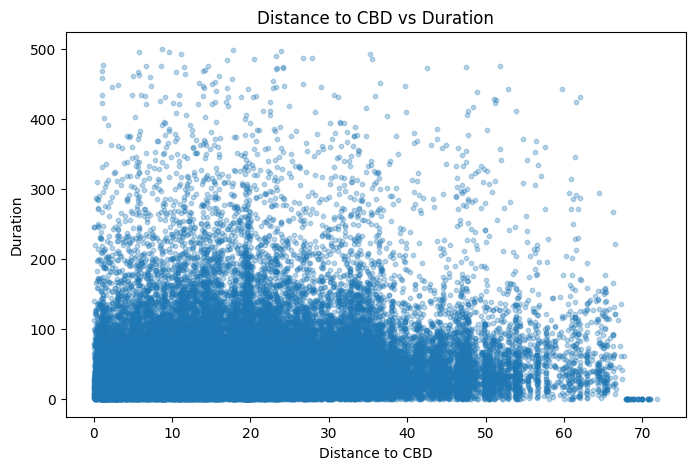

In [ ]:
# Plot 7: scatter check
plt.figure(figsize=(8,5))
plt.scatter(df['distance_to_CBD'], df['duration'], s=10, alpha=0.3)
plt.title("Distance to CBD vs Duration")
plt.xlabel("Distance to CBD")
plt.ylabel("Duration")
plt.show()


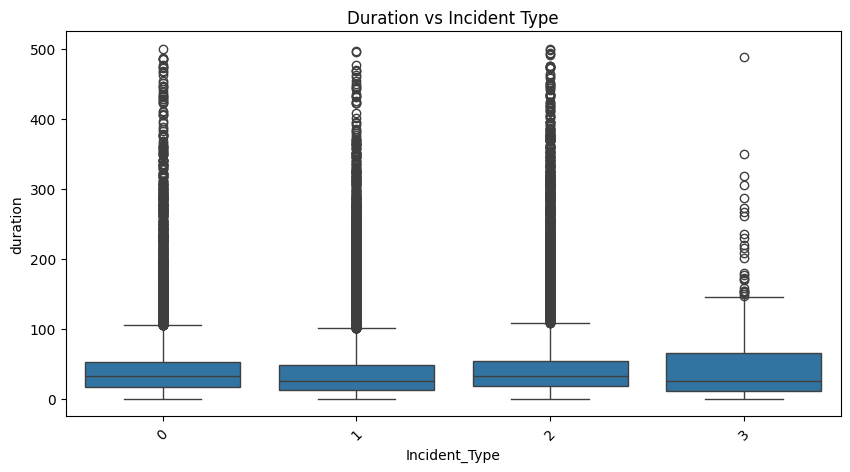

In [ ]:
# Plot 8
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='Incident_Type', y='duration')
plt.title("Duration vs Incident Type")
plt.xticks(rotation=45)
plt.show()


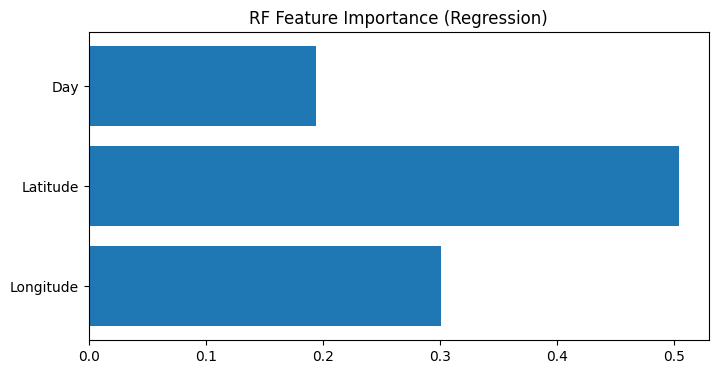

In [ ]:
# Plot 9: rf regression feature importance
imps = rf_model.feature_importances_

plt.figure(figsize=(8,4))
plt.barh(use_cols, imps)
plt.title("RF Feature Importance (Regression)")
plt.show()


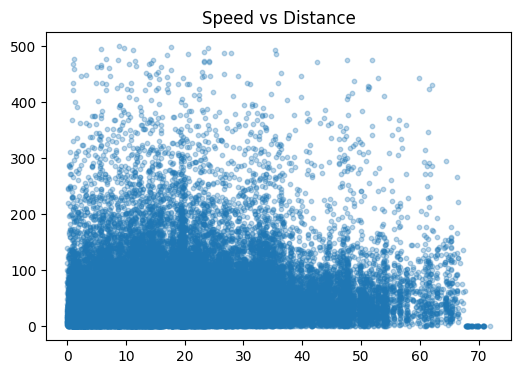

In [ ]:
# Plot 7

plt.figure(figsize=(6,4))

plt.scatter(df['distance_to_CBD'], df['duration'], s=10, alpha=0.3)

plt.title("Speed vs Distance")

plt.show()

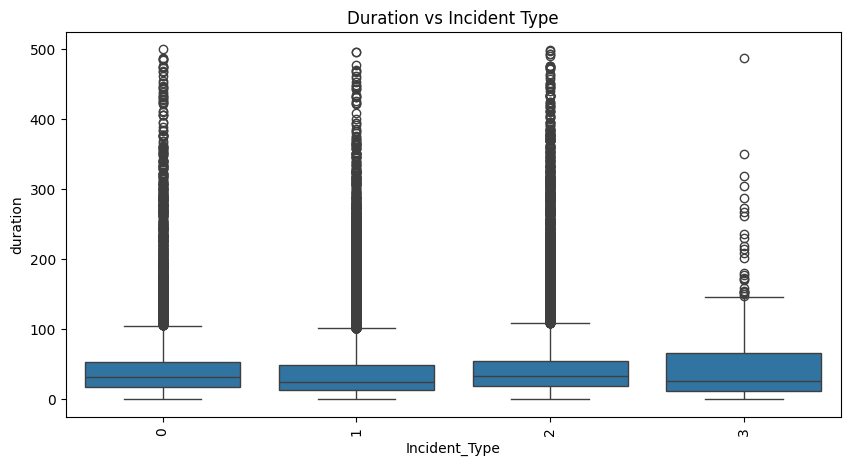

In [ ]:

#plot 8. "Duration vs Incident Type")

plt.figure(figsize=(10,5))

sns.boxplot(data=df, x='Incident_Type', y='duration')

plt.title("Duration vs Incident Type")

plt.xticks(rotation=90)

plt.show()

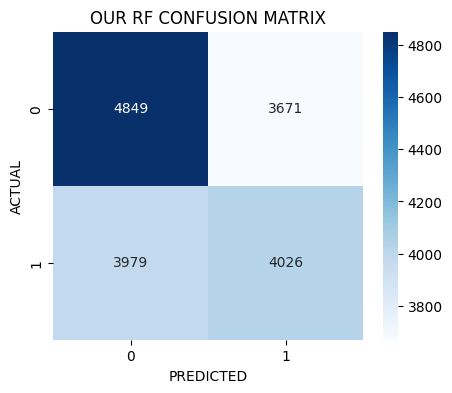

In [ ]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_te2, rf_cpred)

plt.figure(figsize=(5,4))
sns.heatmap(cm,annot=True, fmt='d',cmap='Blues')
plt.title("OUR RF CONFUSION MATRIX")
plt.xlabel("PREDICTED")
plt.ylabel("ACTUAL")
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print("Random Forest Classifier Report:")
print(classification_report(y_te2, rf_cpred))

Random Forest Classifier Report:
              precision    recall  f1-score   support

           0       0.55      0.57      0.56      8520
           1       0.52      0.50      0.51      8005

    accuracy                           0.54     16525
   macro avg       0.54      0.54      0.54     16525
weighted avg       0.54      0.54      0.54     16525



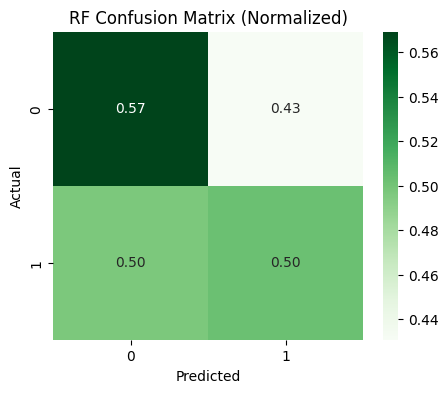

In [ ]:
# normalized confusion matrix for easier interpretation
cm_norm = confusion_matrix(y_te2, rf_cpred, normalize='true')

plt.figure(figsize=(5,4))
sns.heatmap(cm_norm, annot=True, cmap='Greens', fmt=".2f")
plt.title("RF Confusion Matrix (Normalized)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


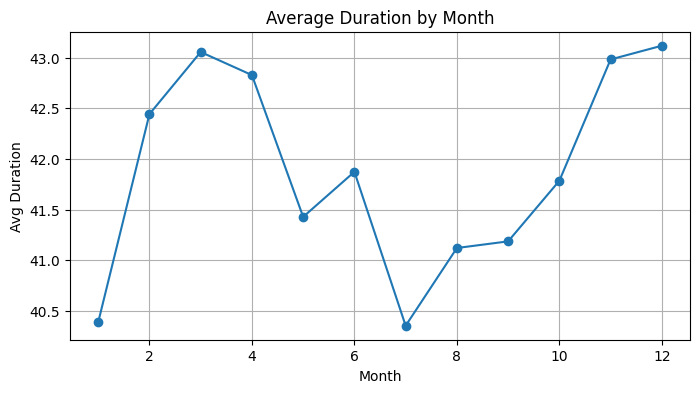

In [ ]:
# average duration by month (1–12)
monthly = df.groupby('Month')['duration'].mean()

plt.figure(figsize=(8,4))
plt.plot(monthly.index, monthly.values, marker='o')
plt.title("Average Duration by Month")
plt.xlabel("Month")
plt.ylabel("Avg Duration")
plt.grid(True)
plt.show()


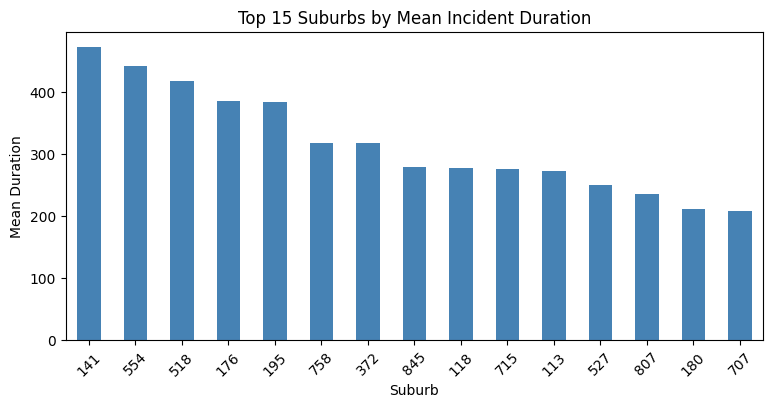

In [ ]:
# seeing which suburbs have higher average durations
suburb_avg = df.groupby('Suburb')['duration'].mean().sort_values(ascending=False).head(15)

plt.figure(figsize=(9,4))
suburb_avg.plot(kind='bar', color='steelblue')
plt.title("Top 15 Suburbs by Mean Incident Duration")
plt.ylabel("Mean Duration")
plt.xticks(rotation=45)
plt.show()


/tmp/ipython-input-1421954764.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['duration'], shade=True, color='red')


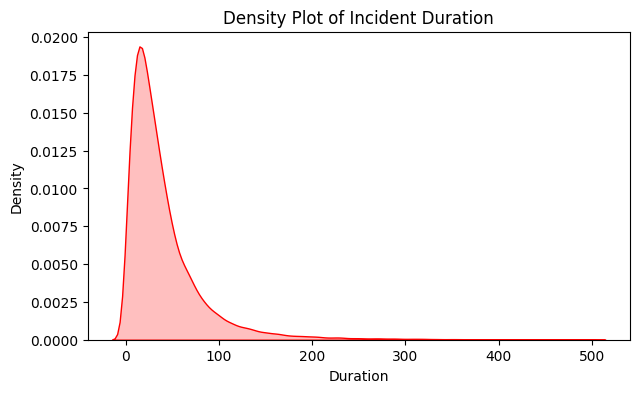

In [ ]:
plt.figure(figsize=(7,4))
sns.kdeplot(df['duration'], shade=True, color='red')
plt.title("Density Plot of Incident Duration")
plt.xlabel("Duration")
plt.show()
